# Part 1: Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import sys
sys.path.insert(0, '/Users/manish/Documents/Projects/data_science/SLR_practice/src')

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/Users/manish/Documents/Projects/data_science/SLR_practice/data/raw data/advertising.csv'

In [3]:
adv = pd.read_csv(path)

In [4]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Part 2: EDA

### Distribution plots

In [7]:
def dist_plots(data):
    
    for i in data.columns:
        
        plt.figure(figsize = (10, 10))
        
        plt.subplot(2, 2, 2)
        sns.boxplot(data = data, x = i, color = 'C2' )
        
        plt.subplot(2, 2, 1)
        sns.kdeplot(x = data[i], color = 'C0')
        
        plt.subplot(2, 2, 4)
        sns.scatterplot(data = data, x = i, y = 'Sales')
        
        plt.subplot(2, 2, 3)
        sns.histplot(data = data, x = i, color = 'C3')
        
        
        if input("Save image?\n(y/n): ").lower() == 'y':
            plt.savefig(f'Distribution plot  of {i}')
        else:
            plt.show()

Save image?
(y/n): n


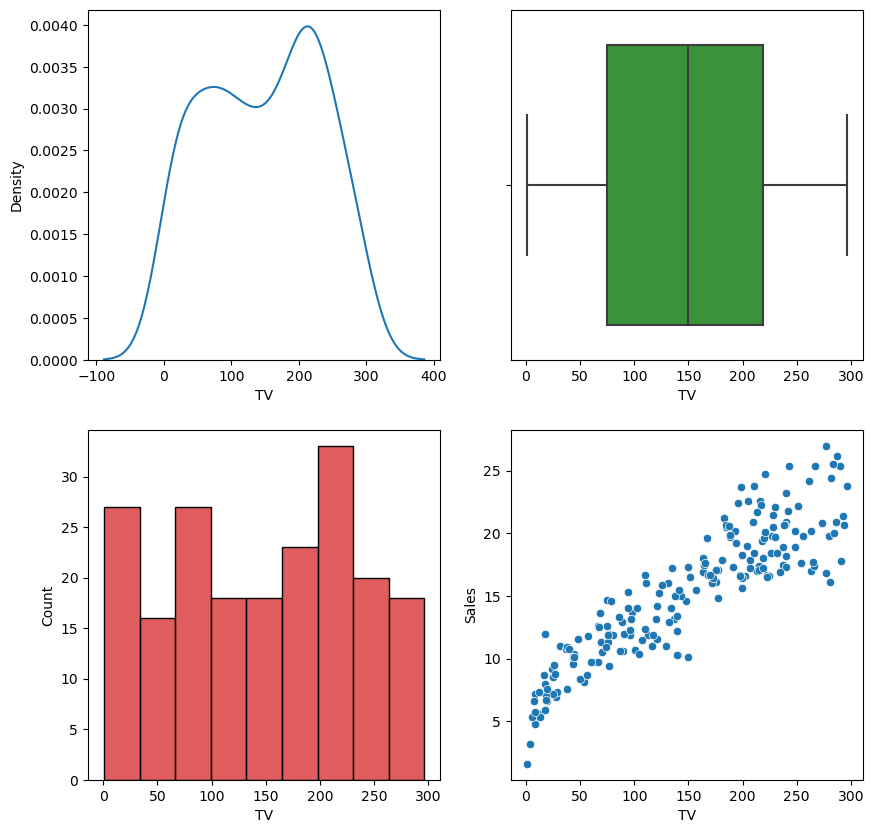

Save image?
(y/n): n


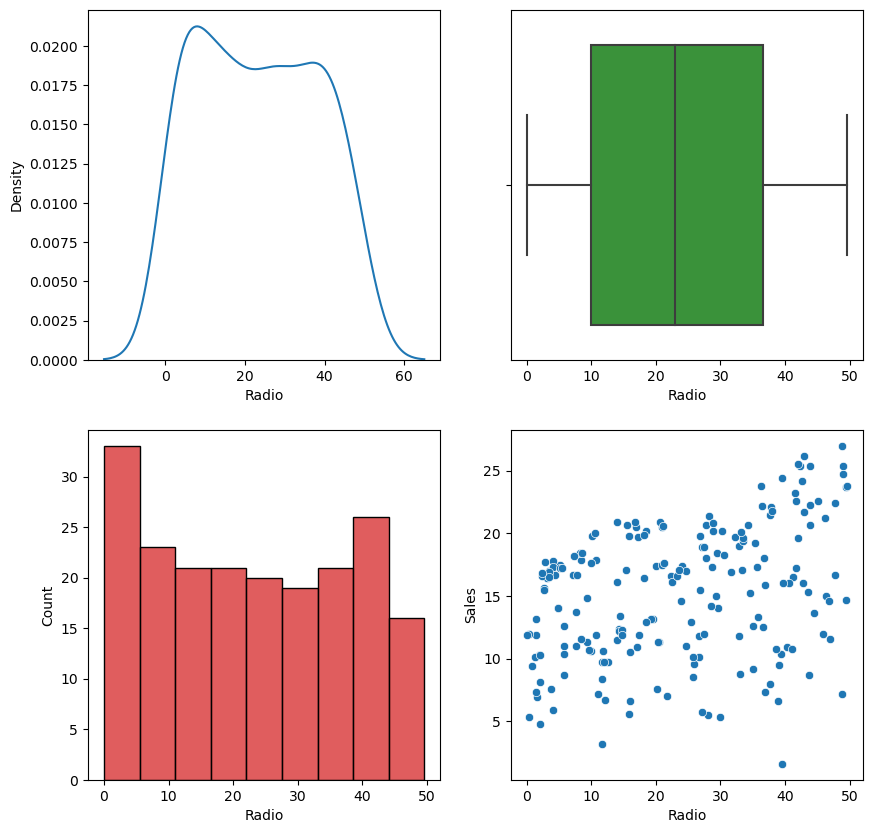

Save image?
(y/n): n


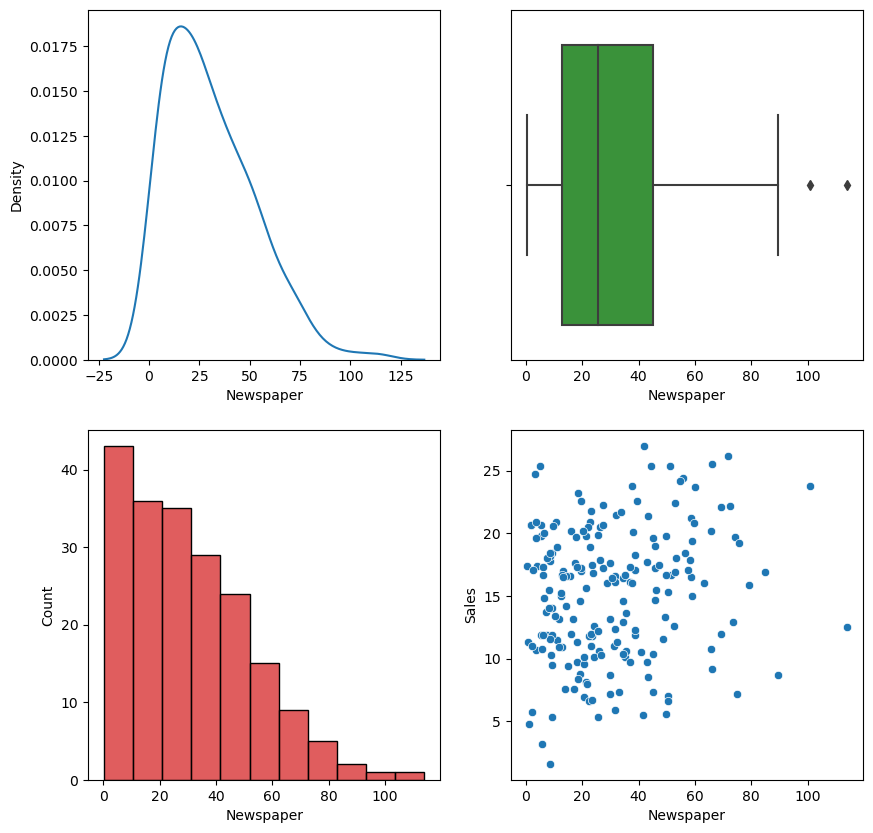

Save image?
(y/n): n


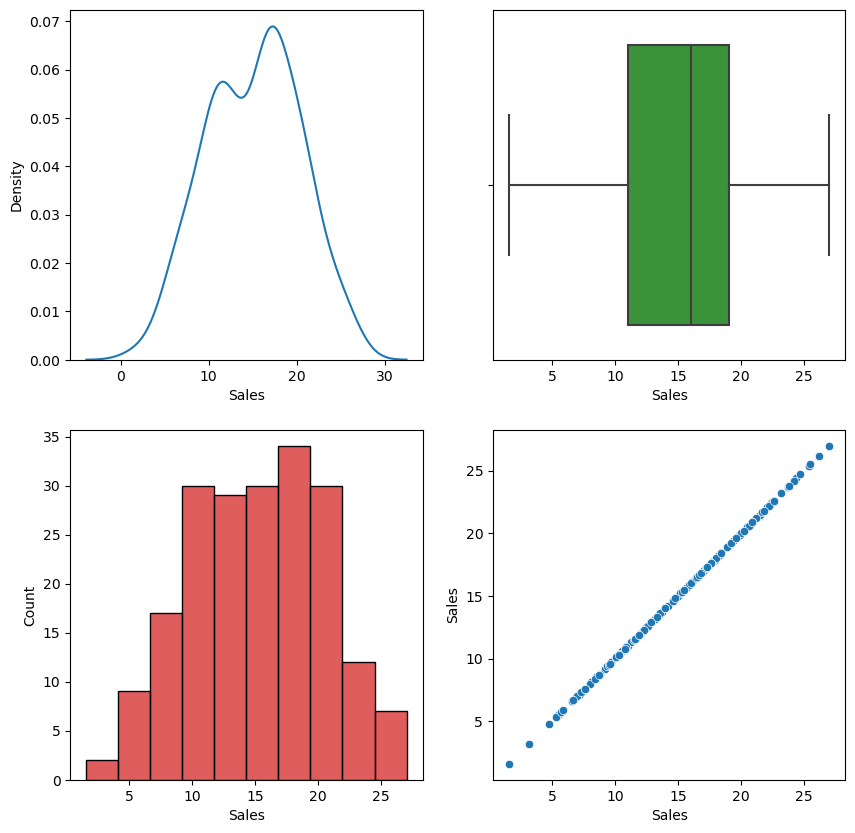

In [8]:
dist_plots(adv)

### Correlation matrix

In [9]:
corr = adv.corr()
print(corr)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


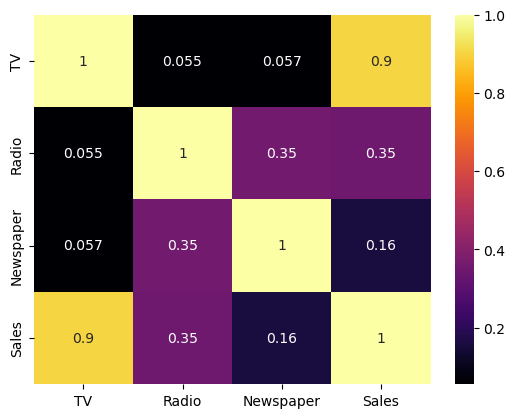

In [10]:
sns.heatmap(corr, annot = True, cmap = 'inferno')
plt.savefig('Correlation heatmap.png', dpi = 500)

    Sales has linear relationship with expenditure on TV advertisement. 
    Also the correlation coefficient of TV to that of Sales is high, 0.9
    
    We will use TV for building a linear model to predict y = Sales

# Part 3: Model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

### Creating X and y

In [12]:
X, y = adv['TV'], adv['Sales']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,
                                                   test_size = 0.3)

In [14]:
print('X', X.shape)
print('y', y.shape)
print('X_train, X_test, y_train, y_test: ', 
      X_train.shape, X_test.shape,
      y_train.shape, y_test.shape)

X (200,)
y (200,)
X_train, X_test, y_train, y_test:  (140,) (60,) (140,) (60,)


### Building model

In [15]:
def regression_plot(X_train, y_train, model):
    
    #checking which model we are using
    if input('Which model?\n(stats/sklearn) ').lower() == 'stats':
        
        sns.scatterplot(x = X_train,
                        y = y_train)
        plt.plot(X_train,
                 model.params[0] + model.params[1] * X_train,
                 'C1')
    
    else:
        sns.scatterplot(x = X_train, 
                        y = y_train)
        plt.plot(X_train,
                 model.intercept_ + model.coef_[0] * X_train,
                 'C1')
    
    #checking if we want to save
    if input('\nSave regression line?\n(y/n) ').lower() == 'y':
        plt.savefig(fname = input('File_name> '), dpi = 500)
    
    else:
        plt.show()

In [16]:
def residual_analysis(X_train, y_train, model):
    
    if input('Which model?\n(stats/sklearn) ').lower() == 'stats':
        
        y_train_pred = model.predict(sm.add_constant(X_train))
    
    else:
        
        y_train_pred = model.predict(X_train.values.reshape(-1, 1))

    
    res = y_train - y_train_pred
    
    plt.figure(figsize = (10, 5))    
    plt.subplot(1, 2, 1)
    sns.distplot(x = res, color = 'C3')
    
    plt.subplot(1, 2, 2)
    sns.scatterplot(x = X_train, y = res)
    
    if input('Save residual analysis?\n(y/n) ').lower() == 'y':
        plt.savefig(input('File name> '), dpi = 500)
    else:
        plt.show() 

In [17]:
def get_model_sm(X_train, y_train):
    
    #model
    lr = sm.OLS(y_train, sm.add_constant(X_train))
    
    model = lr.fit()
    
    #model param
    print(model.params)
    
    #model summary
    print(model.summary2())
    
    if input('Save model?\n(y/n) ').lower() == 'y':
        
        filename = input('Filename> ')
        pickle.dump(model, open(filename, 'wb'))
        
    else:
        pass  

    
    return model

In [18]:
def get_model_sk(X_train, y_train):
    
    #creating lr object of class Linear regression
    lm = LinearRegression()
    
    #fitting the model
    model = lm.fit(X_train.values.reshape(-1,1), y_train)
    
    print('Corfficient: {}'.format(model.coef_))
    print('Intercept: {}'.format(model.intercept_))
    
    if input('Save model?\n(y/n) ').lower() == 'y':
        
        filename = input('Filename> ')
        pickle.dump(model, open(filename, 'wb'))
        
    else:
        pass
    
    return model
        

In [19]:
def model_eval(X_test, y_test, model):
    
    if input('Which model?\n(stats/sklearn) ').lower() == 'stats':
        
        y_test_pred = model.predict(sm.add_constant(X_test))
    
    else:
        
        y_test_pred = model.predict(X_test.values.reshape(-1,1))
        
        
    
    r2 = r2_score(y_true = y_test,
                  y_pred = y_test_pred)
    
    mse = mean_squared_error(y_true = y_test,
                             y_pred = y_test_pred )
    
    print('\nCoeff of determination, r2: {}'.format(r2))
    print('\nMean squared error, mse: {}'.format(mse))
    
    return r2, mse
    
    

### Using statsmodels

    1. Creating and saving a model

In [20]:
model_sm = get_model_sm(X_train, y_train)

const    7.206555
TV       0.054835
dtype: float64
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.798   
Dependent Variable: Sales            AIC:                633.8788
Date:               2023-05-20 09:00 BIC:                639.7621
No. Observations:   140              Log-Likelihood:     -314.94 
Df Model:           1                F-statistic:        550.7   
Df Residuals:       138              Prob (F-statistic): 5.08e-50
R-squared:          0.800            Scale:              5.3422  
--------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const    7.2066      0.4144    17.3919    0.0000    6.3872    8.0259
TV       0.0548      0.0023    23.4673    0.0000    0.0502    0.0595
-----------------------------------------------------------------
Omnibus:               1.13

    2. Checking the regression line

Which model?
(stats/sklearn) stats

Save regression line?
(y/n) n


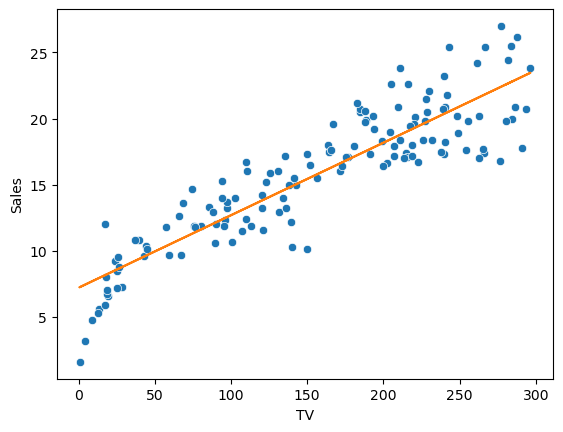

In [21]:
#regression line
regression_plot(X_train, y_train, model_sm)

    3. Residual analysis

Which model?
(stats/sklearn) stats
Save residual analysis?
(y/n) n


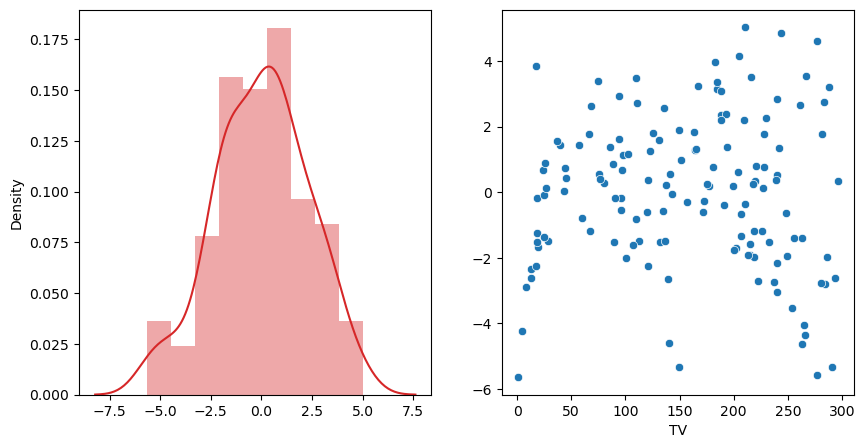

In [22]:
#Residual analysis
residual_analysis(X_train, y_train, model_sm)

    4. Model evaluation 
    

In [23]:
r2_sm, mse_sm = model_eval(X_test, y_test, model_sm)

Which model?
(stats/sklearn) stats

Coeff of determination, r2: 0.8148553892086788

Mean squared error, mse: 5.179525402166657


Which model?
(stats/sklearn) stats

Save regression line?
(y/n) n


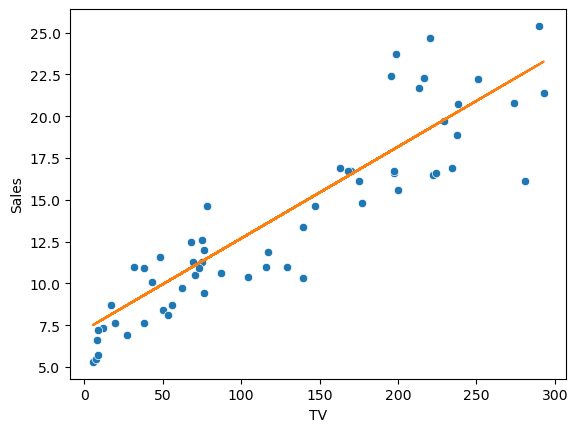

In [24]:
#regression line of y_test
regression_plot(X_test, y_test, model_sm)

### Using sklearn

    1. Creating and saving model

In [25]:
model_sk = get_model_sk(X_train, y_train)

Corfficient: [0.05483488]
Intercept: 7.206554548173257
Save model?
(y/n) n


    2. Checking the regression line

Which model?
(stats/sklearn) sklearn

Save regression line?
(y/n) n


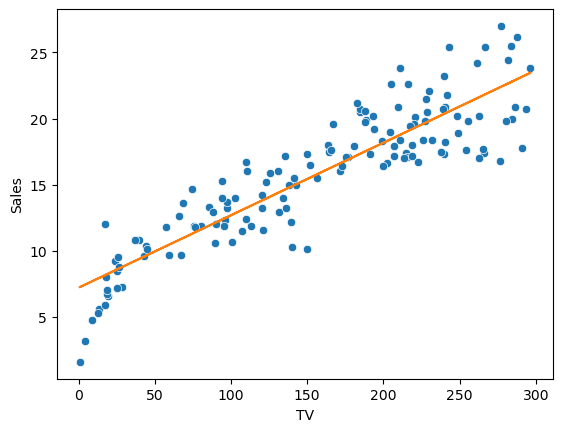

In [26]:
regression_plot(X_train, y_train, model_sk)

    3. Residual analysis

Which model?
(stats/sklearn) sklearn
Save residual analysis?
(y/n) n


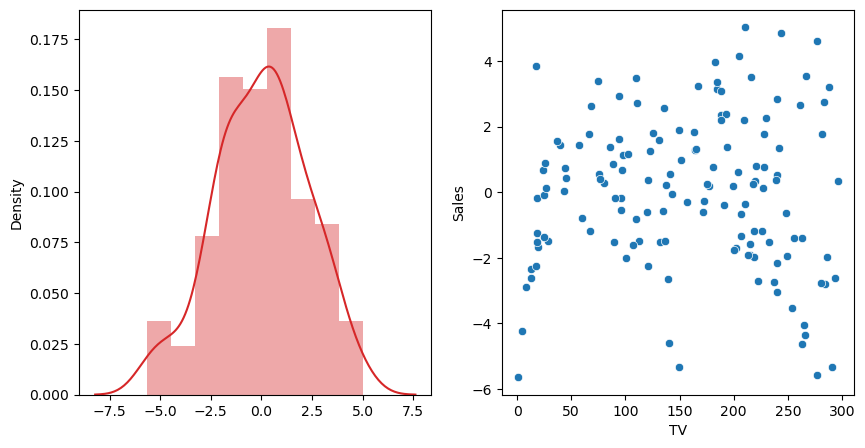

In [27]:
residual_analysis(X_train, y_train, model_sk)

    4. Model Evaluation

In [28]:
r2_sk, mse_sk = model_eval(X_test, y_test, model_sk)

Which model?
(stats/sklearn) sklearn

Coeff of determination, r2: 0.814855389208679

Mean squared error, mse: 5.179525402166655


Which model?
(stats/sklearn) sklearn

Save regression line?
(y/n) n


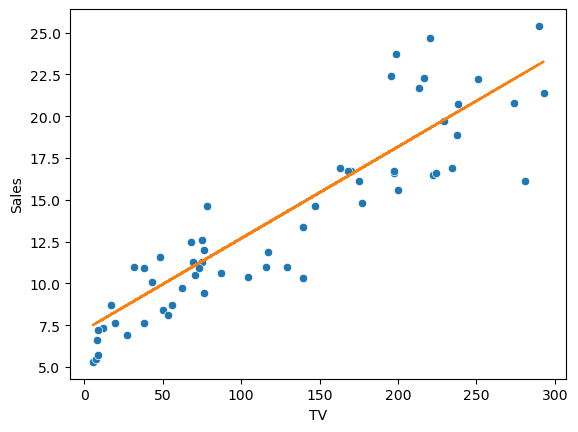

In [29]:
#regression line of y_test 
regression_plot(X_test, y_test, model_sk)